In [1]:
import matplotlib
import uproot, uproot3
import numpy
import awkward
import numba
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import pandas as pd
from tqdm import trange
import ROOT
import os,sys
from array import array

Welcome to JupyROOT 6.22/06


## Lumi

In [2]:
# CMS_lumi
#   Initiated by: Gautier Hamel de Monchenault (Saclay)
#   Translated in Python by: Joshua Hardenbrook (Princeton)
#   Updated by:   Dinko Ferencek (Rutgers)
#

cmsText     = "CMS";
cmsTextFont   = 62  

writeExtraText = True
extraText   = "Preliminary"
extraTextFont = 52 

lumiTextSize     = 0.45
lumiTextOffset   = 0.2

cmsTextSize      = 0.55
cmsTextOffset    = 0.1

relPosX    = 0.045
relPosY    = 0.035
relExtraDY = 1.2

extraOverCmsTextSize  = 0.76

lumi_13TeV = "20.1 fb^{-1}"
lumi_8TeV  = "19.7 fb^{-1}" 
lumi_7TeV  = "5.1 fb^{-1}"
lumi_sqrtS = "41.5 fb^{-1} (13 TeV)"

drawLogo      = False

def CMS_lumi(pad,  iPeriod,  iPosX ):
    outOfFrame    = False
    if(iPosX/10==0 ): outOfFrame = True

    alignY_=3
    alignX_=2
    if( iPosX/10==0 ): alignX_=1
    if( iPosX==0    ): alignY_=1
    if( iPosX/10==1 ): alignX_=1
    if( iPosX/10==2 ): alignX_=2
    if( iPosX/10==3 ): alignX_=3
    align_ = 10*alignX_ + alignY_

    H = pad.GetWh()
    W = pad.GetWw()
    l = pad.GetLeftMargin()
    t = pad.GetTopMargin()
    r = pad.GetRightMargin()
    b = pad.GetBottomMargin()
    e = 0.025

    pad.cd()

    lumiText = ""
    if( iPeriod==1 ):
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==2 ):
        lumiText += lumi_8TeV
        lumiText += " (8 TeV)"

    elif( iPeriod==3 ):      
        lumiText = lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==4 ):
        lumiText += lumi_13TeV
        lumiText += " (13 TeV)"
    elif ( iPeriod==7 ):
        if( outOfFrame ):lumiText += "#scale[0.85]{"
        lumiText += lumi_13TeV 
        lumiText += " (13 TeV)"
        lumiText += " + "
        lumiText += lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
        if( outOfFrame): lumiText += "}"
    elif ( iPeriod==12 ):
        lumiText += "8 TeV"
    elif ( iPeriod==0 ):
        lumiText += lumi_sqrtS
            
    print (lumiText)

    latex = ROOT.TLatex()
    latex.SetNDC()
    latex.SetTextAngle(0)
    latex.SetTextColor(ROOT.kBlack)    
    
    extraTextSize = extraOverCmsTextSize*cmsTextSize
    
    latex.SetTextFont(42)
    latex.SetTextAlign(31) 
    latex.SetTextSize(lumiTextSize*t)    

    latex.DrawLatex(1-r,1-t+lumiTextOffset*t,lumiText)

    if( outOfFrame ):
        latex.SetTextFont(cmsTextFont)
        latex.SetTextAlign(11) 
        latex.SetTextSize(cmsTextSize*t)    
        latex.DrawLatex(l,1-t+lumiTextOffset*t,cmsText)
  
    pad.cd()

    posX_ = 0
    if( iPosX%10<=1 ):
        posX_ =   l + relPosX*(1-l-r)
    elif( iPosX%10==2 ):
        posX_ =  l + 0.5*(1-l-r)
    elif( iPosX%10==3 ):
        posX_ =  1-r - relPosX*(1-l-r)

    posY_ = 1-t - relPosY*(1-t-b)

    if( not outOfFrame ):
        if( drawLogo ):
            posX_ =   l + 0.045*(1-l-r)*W/H
            posY_ = 1-t - 0.045*(1-t-b)
            xl_0 = posX_
            yl_0 = posY_ - 0.15
            xl_1 = posX_ + 0.15*H/W
            yl_1 = posY_
            CMS_logo = ROOT.TASImage("CMS-BW-label.png")
            pad_logo =  ROOT.TPad("logo","logo", xl_0, yl_0, xl_1, yl_1 )
            pad_logo.Draw()
            pad_logo.cd()
            CMS_logo.Draw("X")
            pad_logo.Modified()
            pad.cd()          
        else:
            latex.SetTextFont(cmsTextFont)
            latex.SetTextSize(cmsTextSize*t)
            latex.SetTextAlign(align_)
            latex.DrawLatex(posX_, posY_, cmsText)
            if( writeExtraText ) :
                latex.SetTextFont(extraTextFont)
                latex.SetTextAlign(align_)
                latex.SetTextSize(extraTextSize*t)
                latex.DrawLatex(posX_, posY_- relExtraDY*cmsTextSize*t, extraText)
    elif( writeExtraText ):
        if( iPosX==0):
            posX_ =   l +  relPosX*(1-l-r)
            posY_ =   1-t+lumiTextOffset*t

        latex.SetTextFont(extraTextFont)
        latex.SetTextSize(extraTextSize*t)
        latex.SetTextAlign(align_)
        latex.DrawLatex(posX_+0.1, posY_, extraText)      

    pad.Update()

## tdrstyle

In [3]:
tdrStyle =  ROOT.TStyle("","")

#for the canvas:
tdrStyle.SetCanvasBorderMode(0)
tdrStyle.SetCanvasColor(ROOT.kWhite)
tdrStyle.SetCanvasDefH(1000) #Height of canvas
tdrStyle.SetCanvasDefW(800) #Width of canvas
tdrStyle.SetCanvasDefX(0)   #POsition on screen
tdrStyle.SetCanvasDefY(0)


tdrStyle.SetPadBorderMode(0)
#tdrStyle.SetPadBorderSize(Width_t size = 1)
tdrStyle.SetPadColor(ROOT.kWhite)
tdrStyle.SetPadGridX(False)
tdrStyle.SetPadGridY(False)
tdrStyle.SetGridColor(0)
tdrStyle.SetGridStyle(3)
tdrStyle.SetGridWidth(1)

#For the frame:
tdrStyle.SetFrameBorderMode(1)
tdrStyle.SetFrameBorderSize(1)
tdrStyle.SetFrameFillColor(0)
tdrStyle.SetFrameFillStyle(0)
tdrStyle.SetFrameLineColor(1)
tdrStyle.SetFrameLineStyle(1)
tdrStyle.SetFrameLineWidth(1)

#For the histo:
#tdrStyle.SetHistFillColor(1)
#tdrStyle.SetHistFillStyle(0)
tdrStyle.SetHistLineColor(1)
tdrStyle.SetHistLineStyle(0)
tdrStyle.SetHistLineWidth(1)
#tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
#tdrStyle.SetNumberContours(Int_t number = 20)

tdrStyle.SetEndErrorSize(2)
#tdrStyle.SetErrorMarker(20)
#tdrStyle.SetErrorX(0.)

tdrStyle.SetMarkerStyle(20)

#For the fit/function:
tdrStyle.SetOptFit(1)
tdrStyle.SetFitFormat("5.4g")
tdrStyle.SetFuncColor(2)
tdrStyle.SetFuncStyle(1)
tdrStyle.SetFuncWidth(1)

#For the date:
tdrStyle.SetOptDate(0)
# tdrStyle.SetDateX(Float_t x = 0.01)
# tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
tdrStyle.SetOptFile(0)
tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
tdrStyle.SetStatColor(ROOT.kWhite)
tdrStyle.SetStatFont(42)
tdrStyle.SetStatFontSize(0.025)
tdrStyle.SetStatTextColor(1)
tdrStyle.SetStatFormat("6.4g")
tdrStyle.SetStatBorderSize(1)
tdrStyle.SetStatH(0.1)
tdrStyle.SetStatW(0.15)
# tdrStyle.SetStatStyle(Style_t style = 1001)
# tdrStyle.SetStatX(Float_t x = 0)
# tdrStyle.SetStatY(Float_t y = 0)

# Margins:
tdrStyle.SetPadTopMargin(0.10)
tdrStyle.SetPadBottomMargin(0.10)
tdrStyle.SetPadLeftMargin(0.10)
tdrStyle.SetPadRightMargin(0.10)

# For the Global title:

tdrStyle.SetOptTitle(0)
tdrStyle.SetTitleFont(42)
tdrStyle.SetTitleColor(1)
tdrStyle.SetTitleTextColor(1)
tdrStyle.SetTitleFillColor(10)
tdrStyle.SetTitleFontSize(0.05)
# tdrStyle.SetTitleH(0) # Set the height of the title box
# tdrStyle.SetTitleW(0) # Set the width of the title box
# tdrStyle.SetTitleX(0) # Set the position of the title box
# tdrStyle.SetTitleY(0.985) # Set the position of the title box
# tdrStyle.SetTitleStyle(Style_t style = 1001)
# tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

tdrStyle.SetTitleColor(1, "XYZ")
tdrStyle.SetTitleFont(42, "XYZ")
tdrStyle.SetTitleSize(0.04, "XYZ")
#   tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
#   tdrStyle.SetTitleYSize(Float_t size = 0.02)
tdrStyle.SetTitleXOffset(0.9)
tdrStyle.SetTitleYOffset(1.25)
# tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

tdrStyle.SetLabelColor(1, "XYZ")
tdrStyle.SetLabelFont(42, "XYZ")
tdrStyle.SetLabelOffset(0.007, "XYZ")
tdrStyle.SetLabelSize(0.03, "XYZ")

# For the axis:

tdrStyle.SetAxisColor(1, "XYZ")
tdrStyle.SetStripDecimals(True)
tdrStyle.SetTickLength(0.03, "XYZ")
tdrStyle.SetNdivisions(510, "XYZ")
tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
tdrStyle.SetPadTickY(1)

# Change for log plots:
tdrStyle.SetOptLogx(0)
tdrStyle.SetOptLogy(0)
tdrStyle.SetOptLogz(0)

# Postscript options:
# tdrStyle.SetPaperSize(20.,20.)
# tdrStyle.SetLineScalePS(Float_t scale = 3)
# tdrStyle.SetLineStyleString(Int_t i, const char* text)
# tdrStyle.SetHeaderPS(const char* header)
# tdrStyle.SetTitlePS(const char* pstitle)

# tdrStyle.SetBarOffset(Float_t baroff = 0.5)
# tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
# tdrStyle.SetPaintTextFormat(const char* format = "g")
# tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
# tdrStyle.SetTimeOffset(Double_t toffset)
# tdrStyle.SetHistMinimumZero(kTRUE)

tdrStyle.SetHatchesLineWidth(1)
tdrStyle.SetHatchesSpacing(0.5)

tdrStyle.cd()

## ratio function

In [4]:
from ROOT import TCanvas, TColor, TGaxis, TH1F, TPad
from ROOT import kBlack, kBlue, kRed

def createRatio(h1, h2):
    h3 = h1.Clone("h3")
    h3.SetLineColor(kBlack)
    h3.SetMarkerStyle(21)
    h3.SetTitle("")
    h3.SetMinimum(0.80)
    h3.SetMaximum(1.53)
    # Set up plot for markers and errors
    h3.Sumw2()
    h3.SetStats(0)
    h3.Divide(h2)

    # Adjust y-axis settings
    y = h3.GetYaxis()
    y.SetTitle("Data / MC ")
    y.SetNdivisions(105)
    y.SetTitleSize(20)
    y.SetTitleFont(43)
    y.SetTitleOffset(1.55)
    y.SetLabelFont(43)
    y.SetLabelSize(20)

    # Adjust x-axis settings
    x = h3.GetXaxis()
    x.SetTitleSize(20)
    x.SetTitleFont(43)
    x.SetTitleOffset(4.0)
    x.SetLabelFont(43)
    x.SetLabelSize(20)

    return h3


## Fake Photon plot

In [5]:
plt.style.use(hep.style.CMS)
# import matplotlib as mpl
# mpl.style.use(hep.style.CMS)

In [5]:
@numba.njit
def sgn(num):
    if (num >= 0):
        return 1
    else:
        return -1

In [7]:
# len(branches['gen_weight'])
# true_events = file['nEventsGenWeighted'].values()[0]

### iso charge / sigma ieta ieta 

In [ ]:
def AddHist_iso_sieie(file, hist, isbarrel):
    
#     branches = uproot.open(file+':Events').arrays(['More_than_three_tight_lep','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24','photon_sieie','photon_vidNestedWPBitmap','photon_eta','photon_pt','photon_pfRelIso03_chg'], library='pd')
    branches = uproot.open(file+':Events').arrays(['Generator_weight',\
                                                   'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL',\
                                                   'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL',\
                                                   'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ',\
                                                   'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8',\
                                                   'HLT_Ele32_WPTight_Gsf',\
                                                   'HLT_IsoMu24',\
                                                   'photon_sieie',\
                                                   'photon_vidNestedWPBitmap',\
                                                   'photon_genPartFlav',\
                                                   'photon_eta','photon_pt','photon_pfRelIso03_chg'], library='pd')
    
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu24'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8'] == True
    HLT_EGamma = branches.loc[:,'HLT_Ele32_WPTight_Gsf'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    
    
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
#         2018 is special
    elif 'EGamma' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &   (HLT_EGamma | HLT_DoubleEG) ,:].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon &  ~(HLT_EGamma | HLT_DoubleEG) & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_EGamma | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
        
#     mask_mediumID = (1<<1) | (1<<3) | (1<<5)  | (1<<9) | (1<<11) | (1<<13)
#     arrays['mediumID'] = arrays['photon_vidNestedWPBitmap'] & mask_mediumID
#     arrays = arrays.loc[arrays.loc[:,'mediumID'] == mask_mediumID, :]

#     chg_cut = (arrays.loc[:,"photon_pfRelIso03_chg"]*arrays.loc[:,"photon_pt"]) < 1.141
#     chg_cut = ((arrays.loc[:,"photon_pfRelIso03_chg"]*arrays.loc[:,"photon_pt"]) > 4) & ((arrays.loc[:,"photon_pfRelIso03_chg"]*arrays.loc[:,"photon_pt"]) < 10)
#     sieie_cut = arrays.loc[:,"photon_sieie"] < 0.01015
#     arrays = arrays.loc[chg_cut,:]
 
    
    if isbarrel == 1:
        eta_cut = abs(arrays.loc[:,'photon_eta']) < 1.4442
    elif isbarrel == 0:
        eta_cut = abs((arrays.loc[:,'photon_eta']) > 1.566) & abs((arrays.loc[:,'photon_eta']) < 2.5)
    else:
        eta_cut = arrays.loc[:,'photon_eta'] > -999
        
#     arrays = arrays.loc[eta_cut & three_lep_cut,:]
        
    gen_cut = arrays.loc[:,'photon_genPartFlav'] != 0
    arrays = arrays.loc[eta_cut & gen_cut,:]
    
    for i in trange(0, len(arrays['photon_sieie']), desc=f'fill 2D iso charge / sigma ieta ieta for {file}'):
        hist.Fill(float(arrays['photon_sieie'].values[i]), float(arrays['photon_pfRelIso03_chg'].values[i])*float(arrays['photon_pt'].values[i]))
    
    print("DONE")
    
    return True

In [9]:
xbins = 50
xleft = 0.005
xright = 0.018

ybins = 100
ylow = 0
yup = 20

hist_iso_sieie = ROOT.TH2F("","",xbins,xleft,xright, ybins,ylow,yup)
hist_iso_sieie.Sumw2()

filelist_iso_sieie= [
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/SingleMuon_Run2018A.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/SingleMuon_Run2018B.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/SingleMuon_Run2018C.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/SingleMuon_Run2018D.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/DoubleMuon_Run2018A.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/DoubleMuon_Run2018B.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/DoubleMuon_Run2018C.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/DoubleMuon_Run2018D.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/EGamma_Run2018A.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/EGamma_Run2018B.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/EGamma_Run2018C.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/EGamma_Run2018D.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/MuonEG_Run2018A.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/MuonEG_Run2018B.root",
#     "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/MuonEG_Run2018C.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/wza_UL18_sum_Skim.root",
]

for file in filelist_iso_sieie:
    AddHist_iso_sieie(file, hist_iso_sieie, 1)


fill 2D iso charge / sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/wza_UL18_sum_Skim.root: 100%|██████████| 2267/2267 [00:00<00:00, 64878.66it/s]

DONE


59.7 fb^{-1} (13 TeV)


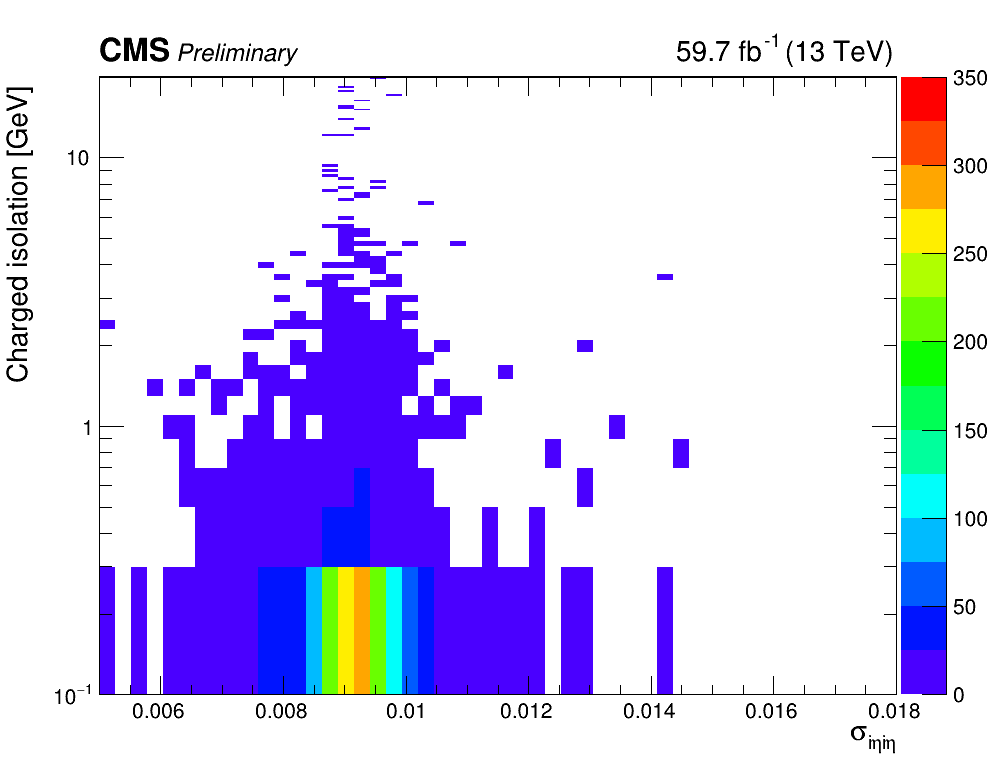

In [10]:
c1 = ROOT.TCanvas("","",1000,800)

hist_iso_sieie.SetStats(False)
c1.Draw()
# Contour_array = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
# hist_iso_sieie.SetContour(16, array('d', Contour_array))
hist_iso_sieie.SetContour(14)
hist_iso_sieie.SetMaximum(350)
hist_iso_sieie.GetYaxis().SetLimits(0.1,20)
hist_iso_sieie.SetXTitle("#sigma_{i#etai#eta}")
hist_iso_sieie.SetYTitle("Charged isolation [GeV]")
hist_iso_sieie.Draw("COLz")

ROOT.gPad.SetLogy()
# ROOT.gPad.SetGrid()
CMS_lumi(c1, 0, 0)

ROOT.gStyle.SetPalette(1)

### Fit

In [12]:
def AddHist_data(file, hist, ptrange, isbarrel):
    
    init_branches = ['photon_sieie','photon_vidNestedWPBitmap','photon_eta','photon_pt','photon_pfRelIso03_chg',\
                'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL',\
                'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8',\
                'HLT_Ele32_WPTight_Gsf_L1DoubleEG',\
                'HLT_IsoMu27']
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu27'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8']
    HLT_SingleElectron = branches.loc[:,'HLT_Ele32_WPTight_Gsf_L1DoubleEG'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
    elif 'SingleElectron' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & HLT_SingleElectron, :].copy()
    elif 'DoubleEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & HLT_DoubleEG, :].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & ~HLT_DoubleEG & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_SingleElectron | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if isbarrel == 1:
        eta_cut = abs(arrays.loc[:,'photon_eta']) < 1.4442
#         chg_cut = (arrays.loc[:,'photon_pfRelIso03_chg']*arrays.loc[:,'photon_pt']) < 1.141
    elif isbarrel == 0:
        eta_cut = abs((arrays.loc[:,'photon_eta']) > 1.566) & abs((arrays.loc[:,'photon_eta']) < 2.5)
#         chg_cut = (arrays.loc[:,'photon_pfRelIso03_chg']*arrays.loc[:,'photon_pt']) < 1.051
        
    mask_mediumID_withoutsieie = (1<<1) | (1<<3) | (1<<5) | (1<<9) | (1<<11) | (1<<13)
    arrays['mediumID'] = arrays['photon_vidNestedWPBitmap'] & mask_mediumID_withoutsieie
    arrays = arrays.loc[arrays.loc[:,'mediumID'] == mask_mediumID_withoutsieie, :]
    
    pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0]) & (arrays.loc[:,'photon_pt'] < ptrange[1]) 
    arrays = arrays.loc[pt_cut & eta_cut,:]
    
    for i in trange(0, len(arrays['photon_sieie']), desc=f'fill sigma ieta ieta for {file}'):
        hist.Fill(float(arrays['photon_sieie'].values[i]))
    
    
def AddHist_mcTruth(file, hist, ptrange, isbarrel, xsec, lumi):
    init_branches = ['Generator_weight',\
                'photon_sieie','photon_vidNestedWPBitmap','photon_genPartFlav','photon_eta','photon_pt','photon_pfRelIso03_chg',\
                'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL',\
                'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8',\
                'HLT_Ele32_WPTight_Gsf_L1DoubleEG',\
                'HLT_IsoMu27']
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    true_events = uproot.open(file)['nEventsGenWeighted'].values()[0]
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu27'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8']
    HLT_SingleElectron = branches.loc[:,'HLT_Ele32_WPTight_Gsf_L1DoubleEG'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
    elif 'SingleElectron' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & HLT_SingleElectron, :].copy()
    elif 'DoubleEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & HLT_DoubleEG, :].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & ~HLT_DoubleEG & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_SingleElectron | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
    
    if isbarrel == 1:
        eta_cut = abs(arrays.loc[:,'photon_eta']) < 1.4442
    elif isbarrel == 0:
        eta_cut = abs((arrays.loc[:,'photon_eta']) > 1.566) & abs((arrays.loc[:,'photon_eta']) < 2.5)
        
    mask_mediumID_withoutsieie = (1<<1) | (1<<3) | (1<<5) | (1<<9) | (1<<11) | (1<<13)
    arrays['mediumID'] = arrays['photon_vidNestedWPBitmap'] & mask_mediumID_withoutsieie
    arrays = arrays.loc[arrays.loc[:,'mediumID'] == mask_mediumID_withoutsieie, :]
    
    pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0]) & (arrays.loc[:,'photon_pt'] < ptrange[1]) 
    gen_cut = arrays.loc[:,'photon_genPartFlav'] != 0
    arrays = arrays.loc[pt_cut & eta_cut & gen_cut,:]
    
    arrays['Generator_weight_sgn'] = arrays['Generator_weight'].apply(lambda x: 1 if x >= 0 else -1)
    arrays['true_weight'] = lumi * xsec * 1000 * arrays['Generator_weight_sgn'] / true_events
    
    for i in trange(0, len(arrays['photon_sieie']), desc=f'fill sigma ieta ieta for {file}'):
        hist.Fill(float(arrays['photon_sieie'].values[i]), float(arrays['true_weight'].values[i]))
        
    
def AddHist_dataFake(file, hist, ptrange, isbarrel):
    init_branches = ['photon_sieie','photon_vidNestedWPBitmap','photon_eta','photon_pt','photon_pfRelIso03_chg',\
                'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL',\
                'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8',\
                'HLT_Ele32_WPTight_Gsf_L1DoubleEG',\
                'HLT_IsoMu27']
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu27'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8']
    HLT_SingleElectron = branches.loc[:,'HLT_Ele32_WPTight_Gsf_L1DoubleEG'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
    elif 'SingleElectron' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & HLT_SingleElectron, :].copy()
    elif 'DoubleEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & HLT_DoubleEG, :].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & ~HLT_DoubleEG & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_SingleElectron | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
        
    if isbarrel == 1:
        eta_cut = abs(arrays.loc[:,'photon_eta']) < 1.4442
    elif isbarrel == 0:
        eta_cut = abs((arrays.loc[:,'photon_eta']) > 1.566) & abs((arrays.loc[:,'photon_eta']) < 2.5)
        
    chg_cut = ((arrays.loc[:,"photon_pfRelIso03_chg"]*arrays.loc[:,"photon_pt"]) > 4) & ((arrays.loc[:,"photon_pfRelIso03_chg"]*arrays.loc[:,"photon_pt"]) < 10)
    pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0]) & (arrays.loc[:,'photon_pt'] < ptrange[1]) 
    arrays = arrays.loc[pt_cut & eta_cut & chg_cut ,:]
    
    for i in trange(0, len(arrays['photon_sieie']), desc=f'fill sigma ieta ieta for {file}'):
        hist.Fill(float(arrays['photon_sieie'].values[i]))
        
# def FakeFraction_Fit(hist_data, hist_mcTruth, hist_dataFake):
    

In [8]:
xbins = 5
xleft = 0.01
xright = 0.06


hist_data = ROOT.TH1F("","",xbins,xleft,xright)
hist_mctruth = ROOT.TH1F("","",xbins,xleft,xright)
hist_datafake = ROOT.TH1F("","",xbins,xleft,xright)
hist_data.Sumw2()
hist_mctruth.Sumw2()
hist_datafake.Sumw2()

filelist_data = [
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017E_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017F_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleMuon_Run2017B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleMuon_Run2017C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleMuon_Run2017D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleMuon_Run2017E_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleMuon_Run2017F_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleElectron_Run2017B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleElectron_Run2017C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleElectron_Run2017D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleElectron_Run2017E_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleElectron_Run2017F_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleEG_Run2017B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleEG_Run2017C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleEG_Run2017D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleEG_Run2017E_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleEG_Run2017F_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/MuonEG_Run2017B_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/MuonEG_Run2017C_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/MuonEG_Run2017D_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/MuonEG_Run2017E_0000.root",
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/MuonEG_Run2017F_0000.root",
]

filelist_mc = [
    "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2017_0000.root",
]

ptrange = [50,5000]

# 1: barrel
# 0: endcap
isbarrel = 0

In [117]:
for file in filelist_data:
    AddHist_data(file, hist_data, ptrange, isbarrel)

fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017B_0000.root: 100%|██████████| 99/99 [00:00<00:00, 144832.96it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017C_0000.root: 100%|██████████| 127/127 [00:00<00:00, 155662.36it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017D_0000.root: 100%|██████████| 61/61 [00:00<00:00, 111628.51it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017E_0000.root: 100%|██████████| 142/142 [00:00<00:00, 155669.41it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017F_0000.root: 100%|██████████| 213/213 [00:00<00:00, 163265.12it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleMuon_Run2017B_0000.root: 0it [00:00, ?it/s]
fill sigma ieta iet

In [118]:
for file in filelist_mc:
#     AddHist_mcTruth(file, hist_mctruth, ptrange, isbarrel,  0.03844, 41.5)
    AddHist_mcTruth(file, hist_mctruth, ptrange, isbarrel,  55.48, 41.5)

fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/ZGToLLG_01J_5f_TuneCP5_13TeV-amcatnloFXFX-pythia8_2017_0000.root: 100%|██████████| 12987/12987 [00:00<00:00, 84441.48it/s]


In [119]:
for file in filelist_data:
    AddHist_dataFake(file, hist_datafake, ptrange, isbarrel)

fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017B_0000.root: 100%|██████████| 51/51 [00:00<00:00, 96616.76it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017C_0000.root: 100%|██████████| 113/113 [00:00<00:00, 114178.84it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017D_0000.root: 100%|██████████| 40/40 [00:00<00:00, 110376.42it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017E_0000.root: 100%|██████████| 93/93 [00:00<00:00, 129076.86it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017F_0000.root: 100%|██████████| 129/129 [00:00<00:00, 154413.59it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleMuon_Run2017B_0000.root: 100%|██████████| 1/1 [00:00<00:00, 6432.9

41.5 fb^{-1} (13 TeV)


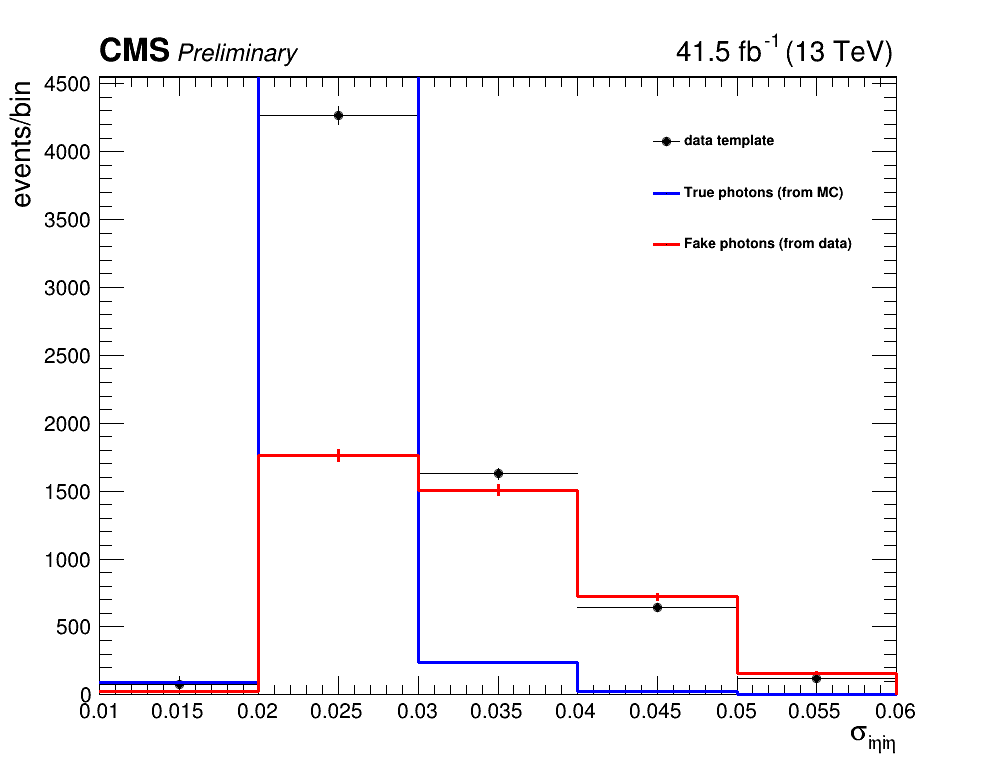

In [18]:
c1 = ROOT.TCanvas("","",1000,800)

hist_data.SetStats(False)
c1.Draw()
hist_data.GetXaxis().SetTitle("#sigma_{i#etai#eta}")
hist_data.GetYaxis().SetTitle("events/bin")
hist_data.Draw("ep")

hist_mctruth.SetMarkerStyle(0)
hist_mctruth.SetLineColor(4)
hist_mctruth.SetLineWidth(3)
hist_mctruth.Draw("HiST SAME e")

hist_datafake.SetMarkerStyle(0)
hist_datafake.SetLineColor(2)
hist_datafake.SetLineWidth(3)
hist_datafake.Draw("HiST SAME e")

legend = ROOT.TLegend(0.65, 0.65, 0.80, 0.85)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.020)
legend.SetLineWidth(1)
legend.SetLineStyle(0)
legend.AddEntry(hist_data,'data template')
legend.AddEntry(hist_mctruth,'True photons (from MC)')
legend.AddEntry(hist_datafake,'Fake photons (from data)')
legend.Draw("SAME")

# ROOT.gPad.SetLogy()
# ROOT.gPad.SetGrid()
CMS_lumi(c1, 0, 0)

41.5 fb^{-1} (13 TeV)
 **********
 **  577 **SET PRINT           1
 **********
 **********
 **  578 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 fake number   4.38000e+02  8.76000e+01    0.00000e+00  8.76000e+02
     2 true number   4.38000e+02  8.76000e+01    0.00000e+00  8.76000e+02
 **********
 **  579 **SET ERR         0.5
 **********
 **********
 **  580 **SET PRINT           1
 **********
 **********
 **  581 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **  582 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=-8577.17 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       S

Info in <TCanvas::Print>: pdf file Fake_Photon/2017/Endcap_pt50_5000_v9.pdf has been created
Info in <TCanvas::Print>: png file Fake_Photon/2017/Endcap_pt50_5000_v9.png has been created


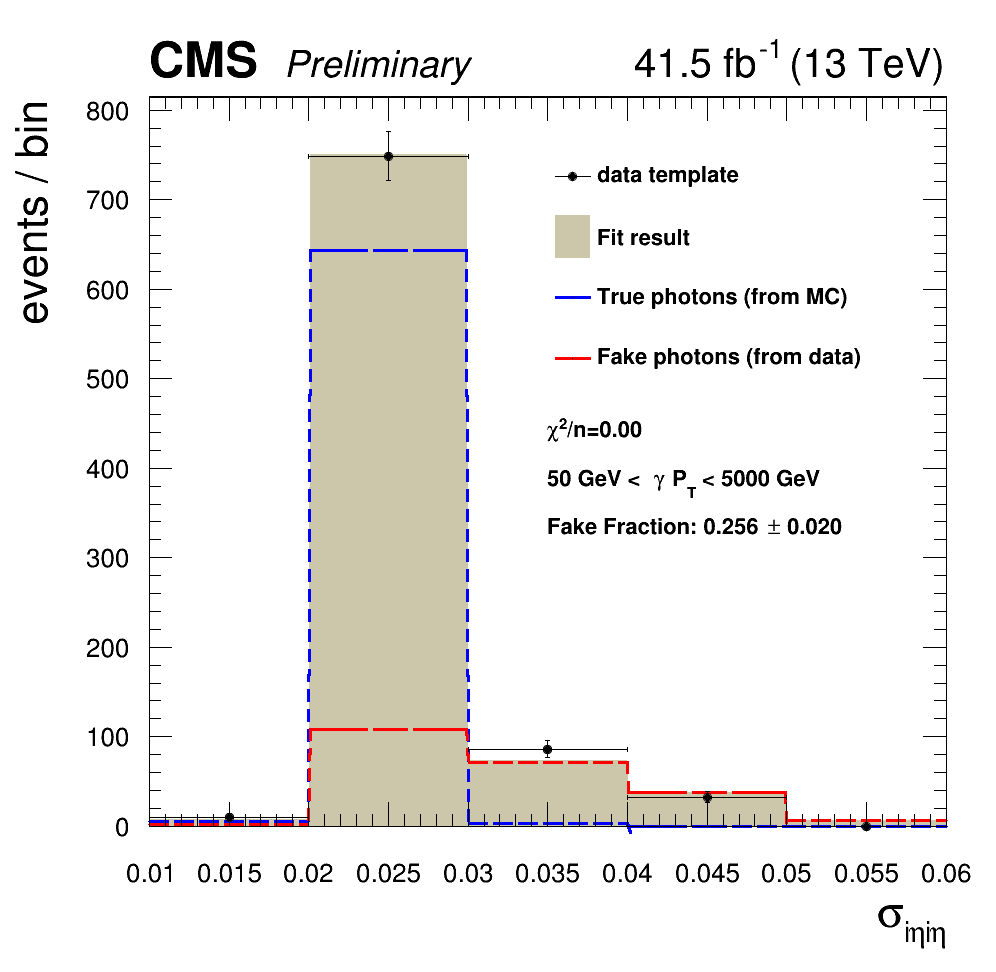

In [120]:
# Observable
sieie = ROOT.RooRealVar("sieie","sieie",xleft,xright)

# Import hist
data_hist = ROOT.RooDataHist("data_hist", "data with x(sieie)", ROOT.RooArgList(sieie), ROOT.RooFit.Import(hist_data))
TruePhotons_hist = ROOT.RooDataHist("TruePhotons_hist", "true photons MC with x(sieie)", ROOT.RooArgList(sieie), ROOT.RooFit.Import(hist_mctruth))
FakePhotons_hist = ROOT.RooDataHist("FakePhotons_hist", "fake photons data with x(sieie)", ROOT.RooArgList(sieie), ROOT.RooFit.Import(hist_datafake))

ndata = hist_data.GetSumOfWeights()

# Parameters
# TrueFraction = ROOT.RooRealVar("TrueFraction","fraction of true photons", 0, 1)
# FakeFraction = ROOT.RooRealVar("FakeFraction","fraction of fake photons", 0, 1)

ntrue = ROOT.RooRealVar("true number", "true number", 0.5*ndata, 0, ndata)
nfake = ROOT.RooRealVar("fake number", "fake number", 0.5*ndata, 0, ndata)

# PDF
true_pdf = ROOT.RooHistPdf("true_pdf", "truepdf", sieie, TruePhotons_hist)
fake_pdf = ROOT.RooHistPdf("fake_pdf", "fakepdf", sieie, FakePhotons_hist)

etrue_pdf = ROOT.RooExtendPdf("ntrue", "ntrue", true_pdf, ntrue)
efake_pdf = ROOT.RooExtendPdf("nfake", "nfake", fake_pdf, nfake)

fullpdf = ROOT.RooAddPdf("fullpdf", "true plus fake", ROOT.RooArgList(etrue_pdf, efake_pdf))

# Fit
fullpdf.fitTo(data_hist, ROOT.RooFit.SumW2Error(True), ROOT.RooFit.Extended(True))

chi2 = ROOT.RooChi2Var("chi2", "chi2", fullpdf, data_hist)
chi2ToNDF = chi2.getVal() / xbins

# Plot
if isbarrel == 1:
    region_mark = "Barrel"
else:
    region_mark = "Endcap"
    
xframe = sieie.frame(ROOT.RooFit.Title(f"{region_mark} region, {ptrange[0]} GeV < photon PT < {ptrange[1]}"), ROOT.RooFit.Bins(xbins))
xframe.GetXaxis().SetTitle("#sigma_{i#etai#eta}")
xframe.GetYaxis().SetTitle("events / bin")
xframe.GetYaxis().SetTitleSize(48)
xframe.GetYaxis().SetTitleFont(43)
xframe.GetYaxis().SetTitleOffset(1.50)
xframe.GetYaxis().SetLabelFont(43)
xframe.GetYaxis().SetLabelSize(28)
xframe.GetYaxis().SetLabelOffset(0.020)

xframe.GetXaxis().SetTitleSize(48)
xframe.GetXaxis().SetTitleFont(43)
xframe.GetXaxis().SetTitleOffset(1.3)
xframe.GetXaxis().SetLabelFont(43)
xframe.GetXaxis().SetLabelSize(28)
xframe.GetXaxis().SetLabelOffset(0.035)

hist_mctruth.SetMarkerStyle(0)
hist_mctruth.SetLineColor(4)
hist_mctruth.SetLineWidth(3)

hist_datafake.SetMarkerStyle(0)
hist_datafake.SetLineColor(2)
hist_datafake.SetLineWidth(3)

data_hist.plotOn(xframe)
fullpdf.plotOn(xframe, ROOT.RooFit.Name("sum"), ROOT.RooFit.FillStyle(4100), ROOT.RooFit.FillColor(20), ROOT.RooFit.DrawOption("F"))
fullpdf.plotOn(xframe, ROOT.RooFit.Components("ntrue"), ROOT.RooFit.Name("true"), ROOT.RooFit.LineColor(4), ROOT.RooFit.LineStyle(9))
fullpdf.plotOn(xframe, ROOT.RooFit.Components("nfake"), ROOT.RooFit.Name("fake"), ROOT.RooFit.LineColor(2), ROOT.RooFit.LineStyle(9))
data_hist.plotOn(xframe)



c1 = ROOT.TCanvas("","",1000,1000)
c1.Draw()
xframe.Draw()

legend = ROOT.TLegend(0.55, 0.60, 0.75, 0.85)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.025)
legend.SetLineWidth(1)
legend.SetLineStyle(0)
legend.AddEntry(hist_data,'data template')
hist_fit_NaN = hist_data.Clone() # Just for plot
hist_fit_NaN.SetLineColor(20)
hist_fit_NaN.SetLineWidth(0)
hist_fit_NaN.SetFillColor(20)
hist_fit_NaN.SetMarkerStyle(0)


legend.AddEntry(hist_fit_NaN,'Fit result', "F")
legend.AddEntry(hist_mctruth,'True photons (from MC)')
legend.AddEntry(hist_datafake,'Fake photons (from data)')
legend.Draw("SAME")

textChi2 = ROOT.TLatex()
textChi2.SetNDC()
textChi2.SetTextSize(0.025)
textChi2.DrawLatex(0.55, 0.55, "#chi^{2}/n="+str("%.2f" % chi2ToNDF))
textChi2.DrawLatex(0.55, 0.50, str(ptrange[0])+" GeV < #gamma P_{T} < "+str(ptrange[1])+" GeV")

# Calculate fake fraction within original sieie cut
result_nfake = nfake.getVal()
result_nfake_err = nfake.getAsymErrorHi()
result_ntrue = ntrue.getVal()
result_ntrue_err = ntrue.getAsymErrorHi()
if isbarrel == 1:
    sieie.setRange('window', 0.00515, 0.01015)
else:
    sieie.setRange('window', 0.0172, 0.0272)
fakeratio = efake_pdf.createIntegral(sieie, sieie, 'window')
nfake_window = result_nfake*fakeratio.getVal()
nfake_window_err = numpy.sqrt(result_nfake_err*result_nfake_err*fakeratio.getVal()*fakeratio.getVal())

trueratio = etrue_pdf.createIntegral(sieie, sieie, 'window')
ntrue_window = result_ntrue*trueratio.getVal()
ntrue_window_err = numpy.sqrt(result_ntrue_err*result_ntrue_err*trueratio.getVal()*trueratio.getVal())

fake_fraction = nfake_window / (nfake_window + ntrue_window)
fake_fraction_err = numpy.sqrt(pow(nfake_window/pow(ntrue_window+nfake_window,2),2)*pow(ntrue_window_err,2) + pow(ntrue_window/pow(nfake_window+ntrue_window,2),2)*pow(nfake_window_err,2))
textChi2.DrawLatex(0.55, 0.45, "Fake Fraction: "+ str("%.3f" % fake_fraction) + "#pm " + str("%.3f" % fake_fraction_err)) 

c1.SetBottomMargin(0.15)
c1.SetTopMargin(0.10)
c1.SetRightMargin(0.05)
c1.SetLeftMargin(0.15)
CMS_lumi(c1, 0, 0)

c1.SaveAs(f'Fake_Photon/2017/{region_mark}_pt{str(ptrange[0])}_{str(ptrange[1])}_v9.pdf')
c1.SaveAs(f'Fake_Photon/2017/{region_mark}_pt{str(ptrange[0])}_{str(ptrange[1])}_v9.png')
# print (ntrue.getVal())
# print (ntrue.getAsymErrorHi())
# print (ntrue.getAsymErrorLo())

## Photon Like Jet weight derive

In [6]:
def AddHist_data_plj(file, hist, ptrange, isbarrel):
    init_branches = ['photon_sieie','photon_vidNestedWPBitmap','photon_eta','photon_pt','photon_pfRelIso03_chg',\
                'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL',\
                'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8',\
                'HLT_Ele32_WPTight_Gsf_L1DoubleEG',\
                'HLT_IsoMu27']
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu27'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8']
    HLT_SingleElectron = branches.loc[:,'HLT_Ele32_WPTight_Gsf_L1DoubleEG'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
    elif 'SingleElectron' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & HLT_SingleElectron, :].copy()
    elif 'DoubleEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & HLT_DoubleEG, :].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & ~HLT_DoubleEG & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_SingleElectron | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
        
    
    if isbarrel == 1:
        eta_cut = abs(arrays.loc[:,'photon_eta']) < 1.4442
#         chg_cut = (arrays.loc[:,'photon_pfRelIso03_chg']*arrays.loc[:,'photon_pt']) < 1.141
    elif isbarrel == 0:
        eta_cut = abs((arrays.loc[:,'photon_eta']) > 1.566) & abs((arrays.loc[:,'photon_eta']) < 2.5)
#         chg_cut = (arrays.loc[:,'photon_pfRelIso03_chg']*arrays.loc[:,'photon_pt']) < 1.051
        
    mask_mediumID = (1<<1) | (1<<3) | (1<<5) | (1<<7) | (1<<9) | (1<<11) | (1<<13)
    arrays['mediumID'] = arrays['photon_vidNestedWPBitmap'] & mask_mediumID
    arrays = arrays.loc[arrays.loc[:,'mediumID'] == mask_mediumID, :]
    
    pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0]) & (arrays.loc[:,'photon_pt'] < ptrange[1]) 
    arrays = arrays.loc[pt_cut & eta_cut,:]
    
    for i in trange(0, len(arrays['photon_pt']), desc=f'fill sigma ieta ieta for {file}'):
        hist.Fill(float(arrays['photon_pt'].values[i]))
    
    
def AddHist_dataFake_plj(file, hist, ptrange, isbarrel):
    init_branches = ['photon_sieie','photon_vidNestedWPBitmap','photon_eta','photon_pt','photon_pfRelIso03_chg',\
                'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL',\
                'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ',\
                'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8',\
                'HLT_Ele32_WPTight_Gsf_L1DoubleEG',\
                'HLT_IsoMu27']
    branches = uproot.open(file+':Events').arrays(init_branches, library='pd')
    HLT_SingleMuon = branches.loc[:,'HLT_IsoMu27'] == True
    HLT_DoubleMuon = branches.loc[:,'HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass8']
    HLT_SingleElectron = branches.loc[:,'HLT_Ele32_WPTight_Gsf_L1DoubleEG'] == True
    HLT_DoubleEG = branches.loc[:,'HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL'] == True
    HLT_MuonEG1 = branches.loc[:,'HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    HLT_MuonEG2 = branches.loc[:,'HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL_DZ'] == True
    if 'SingleMuon' in file:
        arrays = branches.loc[HLT_SingleMuon, :].copy()
    elif 'DoubleMuon' in file:
        arrays = branches.loc[~HLT_SingleMuon & HLT_DoubleMuon, :].copy()
    elif 'SingleElectron' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & HLT_SingleElectron, :].copy()
    elif 'DoubleEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & HLT_DoubleEG, :].copy()
    elif 'MuonEG' in file:
        arrays = branches.loc[~HLT_SingleMuon & ~HLT_DoubleMuon & ~HLT_SingleElectron & ~HLT_DoubleEG & (HLT_MuonEG1 | HLT_MuonEG2),:].copy()
    else:
        arrays = branches.loc[HLT_SingleMuon | HLT_DoubleMuon |  HLT_SingleElectron | HLT_DoubleEG | HLT_MuonEG1 | HLT_MuonEG2,:].copy()
        
    if isbarrel == 1:
        eta_cut = abs(arrays.loc[:,'photon_eta']) < 1.4442
    elif isbarrel == 0:
        eta_cut = abs((arrays.loc[:,'photon_eta']) > 1.566) & abs((arrays.loc[:,'photon_eta']) < 2.5)
        
    chg_cut = ((arrays.loc[:,"photon_pfRelIso03_chg"]*arrays.loc[:,"photon_pt"]) > 4) & ((arrays.loc[:,"photon_pfRelIso03_chg"]*arrays.loc[:,"photon_pt"]) < 10)
    pt_cut = (arrays.loc[:,'photon_pt'] >= ptrange[0]) & (arrays.loc[:,'photon_pt'] < ptrange[1]) 
    arrays = arrays.loc[pt_cut & eta_cut & chg_cut ,:]
    
    for i in trange(0, len(arrays['photon_pt']), desc=f'fill sigma ieta ieta for {file}'):
        hist.Fill(float(arrays['photon_pt'].values[i]))
        
# def FakeFraction_Fit(hist_data, hist_mcTruth, hist_dataFake):
    

In [10]:
isbarrel = 0

if isbarrel == 1:
    xbins = [20, 30, 50, 80, 120, 5000]
    ff = [0.500, 0.298, 0.160, 0.098, 0.051]
else:
    xbins = [20, 50, 5000]
    ff = [0.332, 0.115]

from array import array
hist_data_plj = ROOT.TH1F("","",len(xbins)-1,array('d', xbins))
hist_datafake_plj = ROOT.TH1F("","",len(xbins)-1,array('d', xbins))
hist_data_plj.Sumw2()
hist_datafake_plj.Sumw2()

for file in filelist_data:
    AddHist_data_plj(file, hist_data_plj, [20,5000], isbarrel)

for file in filelist_data:
    AddHist_dataFake_plj(file, hist_datafake_plj, [20,5000], isbarrel)

for i in range(1, len(xbins)):
    nume = hist_datafake_plj.GetBinContent(i)
    deno = hist_data_plj.GetBinContent(i)
    fraction = ff[i-1]
    print(f'{xbins[i-1]}-{xbins[i]}: {nume}/{deno}*{fraction} = {nume/deno*fraction}')

fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017B_0000.root: 100%|██████████| 376/376 [00:00<00:00, 157328.24it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017C_0000.root: 100%|██████████| 768/768 [00:00<00:00, 178688.94it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017D_0000.root: 100%|██████████| 342/342 [00:00<00:00, 172700.69it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017E_0000.root: 100%|██████████| 651/651 [00:00<00:00, 178381.91it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/SingleMuon_Run2017F_0000.root: 100%|██████████| 956/956 [00:00<00:00, 177721.59it/s]
fill sigma ieta ieta for /eos/user/s/sdeng/WZG_analysis/fake_photon_template/CR/2017/DoubleMuon_Run2017B_0000.root: 100%|██████████| 9/9 [00:00<00:00,

20-50: 4192.0/3416.0*0.332 = 0.40741920374707263
50-5000: 565.0/706.0*0.115 = 0.09203257790368272


## test

In [30]:
test_branches = uproot.open("/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/SingleMuon_Run2018B.root"+':Events')
# test_branches.keys(filter_name="photon*")
test_arrays = test_branches.arrays(['More_than_three_tight_lep','photon_genPartFlav','photon_sieie','photon_vidNestedWPBitmap','Photon_sieie','Photon_vidNestedWPBitmap','photon_pt','photon_pfRelIso03_chg','photon_eta'], library='pd')

# test_cut = (test_arrays.loc[:,"photon_pfRelIso03_chg"]*test_arrays.loc[:,"photon_pt"]) > 1.141
# test_cut2 = abs(test_arrays.loc[:,"photon_eta"]) < 1
# test_arrays = test_arrays.loc[test_cut & test_cut2,:]
# test_arrays['pt_x_chg'] = test_arrays.loc[:,"photon_pfRelIso03_chg"]*test_arrays.loc[:,"photon_pt"]
test_arrays

# test_branches.show()
# test = 0
# for i in range(len(test_arrays["photon_vidNestedWPBitmap"])):
#     if (float(test_arrays['photon_pt'].values[i])==0):
#         test += 1
# #     print (bin(test_arrays["photon_vidNestedWPBitmap"].values[i]))
# print (test)

More_than_three_tight_lep  photon_genPartFlav  photon_sieie  \
entry subentry                                                                
0     0                                 1                   0      0.000000   
      1                                 1                   0      0.000000   
1     0                                 0                  -1      0.036835   
      1                                 0                  -1      0.036835   
4     0                                 0                  -1      0.008957   
...                                   ...                 ...           ...   
180   0                                 1                   0      0.000000   
      1                                 1                   0      0.000000   
181   0                                 1                   0      0.000000   
      1                                 1                   0      0.000000   
183   0                                 0                  -1      0.009140   

                photon_vidNestedWPBitmap  Photon_sieie  \
entry subentry                                           
0     0                                0      0.011024   
      1                                0      0.008865   
1     0                            15423      0.036835   
      1                            15423      0.008873   
4     0                            16383      0.008957   
...                                  ...           ...   
180   0                                0      0.008820   
      1                                0      0.009605   
181   0                                0      0.017990   
      1                                0      0.021637   
183   0                            15615      0.009140   

                Photon_vidNestedWPBitmap  photon_pt  photon_pfRelIso03_chg  \
entry subentry                                                               
0     0                            16191   0.000000               0.000000   
      1                            16383   0.000000               0.000000   
1     0                            15423  76.549034               0.176871   
      1                            16383  76.549034               0.176871   
4     0                            16383  78.530418               0.004755   
...                                  ...        ...                    ...   
180   0                            16383   0.000000               0.000000   
      1                            16383   0.000000               0.000000   
181   0                             1087   0.000000               0.000000   
      1                            16383   0.000000               0.000000   
183   0                            15615  45.296387               0.246891   

                photon_eta  
entry subentry              
0     0           0.000000  
      1           0.000000  
1     0           2.057129  
      1           2.057129  
4     0           0.092896  
...                    ...  
180   0           0.000000  
      1           0.000000  
181   0           0.000000  
      1           0.000000  
183   0           0.813843  

[291 rows x 9 columns]

In [31]:
print (bin(16191))

0b11111100111111


In [32]:
file_test = "/eos/user/s/sdeng/WZG_analysis/fake_photon_template/2018/wza_UL18_sum_Skim.root"
branches_test = uproot.open(file_test+':Events').arrays(['have_loose_lep','Generator_weight','More_than_three_tight_lep','HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL','HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ','HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8','HLT_Ele32_WPTight_Gsf','HLT_IsoMu24','photon_sieie','photon_vidNestedWPBitmap','photon_genPartFlav','photon_eta','photon_pt','photon_pfRelIso03_chg'], library='pd')
true_events_test = uproot.open(file_test)['nEventsGenWeighted'].values()[0]
    
true_events_test

112380.0

59.7 fb^{-1} (13 TeV)


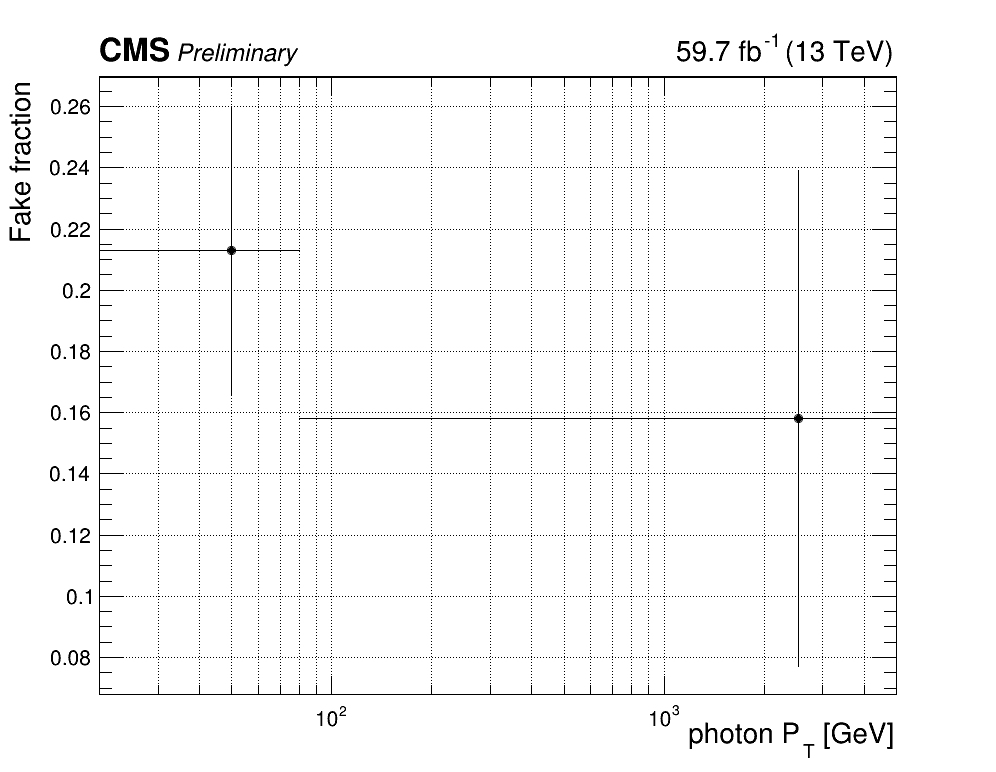

In [33]:
from array import array
# ff_pt_bin = [20, 30, 50, 80, 5000]
# ff_pt_bin = [20, 50, 80, 5000]
ff_pt_bin = [20, 80, 5000]
# ff_pt_bin = [20, 5000]
hist_ff_pt = ROOT.TH1F("","",2,array('d',ff_pt_bin))
hist_ff_pt.GetXaxis().SetTitle("photon P_{T} [GeV]")
hist_ff_pt.GetYaxis().SetTitle("Fake fraction")

# hist_ff_pt.SetBinContent(1, 0.433)
# hist_ff_pt.SetBinContent(2, 0.073)
# hist_ff_pt.SetBinContent(3, 0.107)
# hist_ff_pt.SetBinContent(4, 0.158)
# hist_ff_pt.SetBinError(1, 0.094)
# hist_ff_pt.SetBinError(2, 0.057)
# hist_ff_pt.SetBinError(3, 0.064)
# hist_ff_pt.SetBinError(4, 0.081)

# hist_ff_pt.SetBinContent(1, 0.258)
# hist_ff_pt.SetBinContent(2, 0.107)
# hist_ff_pt.SetBinContent(3, 0.158)
# hist_ff_pt.SetBinError(1, 0.059)
# hist_ff_pt.SetBinError(2, 0.064)
# hist_ff_pt.SetBinError(3, 0.081)

hist_ff_pt.SetBinContent(1, 0.213)
hist_ff_pt.SetBinContent(2, 0.158)
hist_ff_pt.SetBinError(1, 0.047)
hist_ff_pt.SetBinError(2, 0.081)

# hist_ff_pt.SetBinContent(1, 0.197)
# hist_ff_pt.SetBinError(1, 0.041)

c1 = ROOT.TCanvas("","",1000,800)
c1.Draw()
hist_ff_pt.Draw()
ROOT.gPad.SetLogx()
ROOT.gPad.SetGrid()

CMS_lumi(c1,0,0)